In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [198]:
data = pd.read_csv('Titanic_Dataset.csv')

In [199]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [200]:
# Missing Values

data.isnull().sum()[data.isnull().sum()!=0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [201]:
# we want to check how many not null values in each class.


data.loc[data.Cabin.notnull(), "Pclass"].value_counts()

Pclass
1    176
2     16
3     12
Name: count, dtype: int64

In [202]:
## Here we can see 176 is not null values  in 1st class, 16 persons is not null values in  2nd class and 
## 12 not null values in 3rd class.

In [203]:
data.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [204]:
# Bin the Cabins
cabins = data.Cabin.unique()[1:]


def cab(x):
    if x in cabins:
        return("Cabin_Allotted")
    else:
        return("Missing")

In [205]:
data["Cabin_Cat"] = data.Cabin.apply(cab)

In [206]:
pd.get_dummies(data, drop_first = True).shape

(891, 1727)

<Axes: xlabel='Cabin_Cat'>

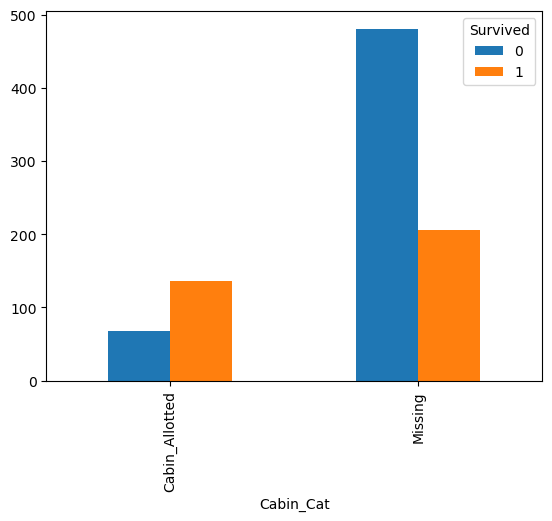

In [207]:
# Cabin vs Survived
tbl = pd.crosstab(data.Cabin_Cat, data.Survived)

tbl.plot(kind = "bar")

In [208]:
# Parch and Sibsp

data["Family"] = data.SibSp+data.Parch+1

In [209]:
data.Family.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [210]:
# 1 Singles, 2 couple 3 small family, >3: Large

def fam(x):
    if x ==1:
        return("Solo")
    elif x ==2:
        return("Couple")
    elif x==3:
        return("Small_Family")
    else:
        return("Large_Family")

In [211]:
data["Family_Cat"] = data.Family.apply(fam)

<Axes: xlabel='Family_Cat'>

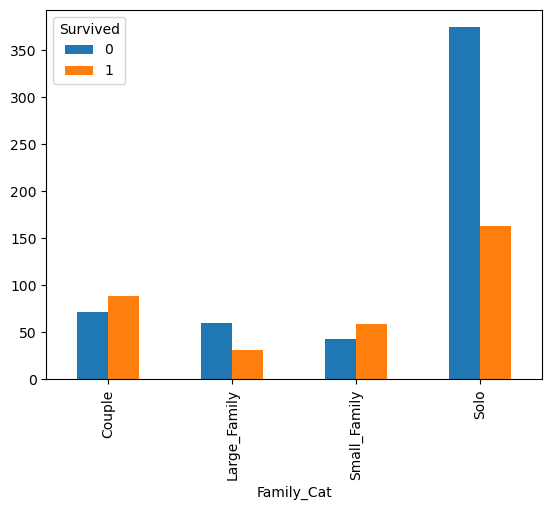

In [212]:
tbl = pd.crosstab(data.Family_Cat, data.Survived)

tbl.plot(kind = "bar")

In [213]:
data.groupby("Sex")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [214]:
titles = []
for i in data.Name:
    titles.append(i.split(",")[1].split(". ")[0].strip())

In [215]:
data["titles"] = pd.Series(titles)

In [216]:
data.titles.nunique()

17

In [217]:
ignore = ['Don', 'Rev', 'Dr', 'Mme',
       'Major', 'Lady', 'Sir', 'Mlle', 
          'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona']

def dont_need(x):
    if x in ignore:
        return("Others")
    else:
        return(x)

In [218]:
data["titles"] = data.titles.apply(dont_need)

In [219]:
data.groupby("titles")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
titles,,,,,,,,
Master,36.0,4.574167,3.619872,0.42,1.000,3.5,8.0,12.0
Miss,146.0,21.773973,12.990292,0.75,14.125,21.0,30.0,63.0
Mr,398.0,32.368090,12.708793,11.00,23.000,30.0,39.0,80.0
Mrs,108.0,35.898148,11.433628,14.00,27.750,35.0,44.0,63.0
Ms,1.0,28.000000,NaN,28.00,28.000,28.0,28.0,28.0
Others,25.0,42.960000,13.135448,23.00,32.000,45.0,52.0,70.0


In [220]:
data.loc[(data.Age.isnull()) & 
             (data.titles == "Master"), "Age"] = 4

data.loc[(data.Age.isnull()) & 
             (data.titles == "Miss"), "Age"] = 22

data.loc[(data.Age.isnull()) & 
             (data.titles == "Mr"), "Age"] = 29

data.loc[(data.Age.isnull()) & 
             (data.titles == "Mrs"), "Age"] = 35.5

data.loc[(data.Age.isnull()) & 
             (data.titles == "Ms"), "Age"] = 28

data.loc[(data.Age.isnull()) & 
             (data.titles == "Others"), "Age"] = 45

In [221]:
data.loc[data.Fare.isnull(), 
             "Fare"] = data.Fare.median()

In [222]:
# Embarked
data.loc[data.Embarked.isnull(), "Embarked"] = \
data.Embarked.mode()[0]

In [223]:
# Drop the Unnecessary columns
data.drop(["PassengerId", 
               "Parch", "SibSp", 
               "Name", "Cabin", "Ticket"], 
              axis = 1, inplace = True)

In [252]:
data['Sex'] = data['Sex'].replace({'female':0,'male':1})


In [225]:
data['Sex'] = data['Sex'].astype(int)

In [231]:
data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [234]:
data['Embarked'] = data['Embarked'].replace({'C':1,'S':2,'Q':3})


In [235]:
data['Embarked'] = data['Embarked'].astype(int)

In [241]:
data['Cabin_Cat'] = data['Cabin_Cat'].replace({'Missing':0,'Cabin_Allotted':1})


In [242]:
data['Cabin_Cat'] = data['Cabin_Cat'].astype(int)

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    int32  
 6   Cabin_Cat   891 non-null    int32  
 7   Family      891 non-null    int64  
 8   Family_Cat  891 non-null    object 
 9   titles      891 non-null    object 
dtypes: float64(2), int32(3), int64(3), object(2)
memory usage: 59.3+ KB


In [248]:
data.titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Ms'], dtype=object)

In [249]:
data['Family_Cat'] = data['Family_Cat'].replace({'Couple':2,'Solo':1,'Large_Family':5,'Small_Family':3})
data['titles'] = data['titles'].replace({'Mr':2, 'Mrs':3, 'Miss':4, 'Master':6, 'Others':7, 'Ms':1})


In [250]:
data['Family_Cat'] = data['Family_Cat'].astype(int)
data['titles'] = data['titles'].astype(int)

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    int32  
 6   Cabin_Cat   891 non-null    int32  
 7   Family      891 non-null    int64  
 8   Family_Cat  891 non-null    int32  
 9   titles      891 non-null    int32  
dtypes: float64(2), int32(5), int64(3)
memory usage: 52.3 KB


In [253]:
# Split the Data in Train and Test
x = data.drop(columns=['Survived'])
y= data['Survived']

from sklearn.model_selection import train_test_split

xtrain, ytrain, xtest,ytest = train_test_split(x,y,test_size=0.3,random_state=12)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((623, 9), (623,), (268, 9), (268,))

In [254]:
# Split the Data in Train and Test


train = data.loc[0:xtrain.shape[0]-1, :]
test = data.loc[xtrain.shape[0]:, :]

train.shape,test.shape

((623, 10), (268, 10))

In [255]:
test.drop("Survived", axis = 1, inplace = True)

## Statistical Analysis

In [256]:
input_vars = ["Pclass", "Sex", "Embarked", 
              "Cabin_Cat", "Family_Cat", "titles"]

import scipy.stats as stats

# Ho: that the predictors and target are independent. It means
# Predictor Variables are not helping in predicting the Survival
# Ha: Ho is False

for i in input_vars:
    tbl = pd.crosstab(data.loc[:, i], train.Survived)
    teststats, pvalue, deg, exp_freq = stats.chi2_contingency(tbl)
    print(i, pvalue)


Pclass 6.824644606550509e-14
Sex 2.8026604519347837e-43
Embarked 0.0009004944795629979
Cabin_Cat 4.656434301986769e-12
Family_Cat 8.830296235861556e-07
titles 3.842818756766538e-42


In [260]:
# Dummy

dummytrain = pd.get_dummies(train, drop_first=True)
dummytest = pd.get_dummies(test, drop_first=True)

X = dummytrain.drop("Survived", axis = 1)

y = dummytrain.Survived

In [261]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

pred = logreg.fit(X,y).predict(dummytest)

In [270]:
# Submission

submission = pd.read_csv("gender_submission.csv")

In [271]:
#submission["Survived"]= pred

submission["Survived"] = submission.Survived.astype(int)

In [272]:
submission.to_csv("NewLogreg_titanic.csv", index = False)

In [274]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
